## Introduction to the assignment

For this analysis, we will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz

The goal of this analysis is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|---------|---------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	  |gender of head of household (male=1)|
|hohage   |age of head of household|
|age      |years old|
|folnum	  |individual id|
|village  |	village id|
|sc97	  |schooling in 1997|

In [1]:
# Importing libraries

import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from pylab import *
from scipy import *
from pylab import rcParams
import statsmodels.formula.api as smf
%matplotlib inline

progresa_df= pd.read_csv('progresa_sample.csv')



---

##Part 1: Descriptive analysis

### 1.1	Summary Statistics



In [2]:
prog_sum = progresa_df.describe()
prog_sum.loc[['mean','std']][['sex','indig','dist_sec','sc','grc','fam_n','min_dist','dist_cap',  
                                     'hohedu','hohwag','welfare_index','hohsex','hohage','age','grc97','sc97']]

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,hohedu,hohwag,welfare_index,hohsex,hohage,age,grc97,sc97
mean,0.512211,0.298324,2.418910,0.819818,3.963537,7.215715,103.447520,147.674452,2.768104,586.985312,690.346564,0.925185,44.436717,11.366460,3.705372,0.813922
std,0.499854,0.457525,2.234109,0.384342,2.499063,2.352900,42.089441,76.063134,2.656106,788.133664,139.491130,0.263095,11.620372,3.167744,2.572387,0.389172


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? 

In [3]:
#Restructuring columns
progresa_df.loc[progresa_df.progresa == '0', 'progresa'] = 0
progresa_df.loc[progresa_df.progresa == 'basal', 'progresa'] = 1
progresa_df.loc[progresa_df.poor == 'pobre', 'poor'] = 1
progresa_df.loc[progresa_df.poor == 'no pobre', 'poor'] = 0

#Subsetting data
prog_treatment = progresa_df[(progresa_df.year == 97) & (progresa_df.poor == 1) & (progresa_df.progresa == 1)]
prog_control = progresa_df[(progresa_df.year == 97) & (progresa_df.poor == 1) & (progresa_df.progresa == 0)]

test_df = pd.DataFrame(columns= ['Variable name', 'Average value (Treatment villages)','Average value (Control villages)','Difference (Treat - Control)','p-value'])
cols = [col for col in progresa_df.columns if col not in ['year', 'folnum', 'village', 'poor', 'progresa']]
df2 = progresa_df[cols]


for i in cols:
    test_df.set_value(cols.index(i),'Variable name', i)
    test_df.set_value(cols.index(i), 'Average value (Treatment villages)', prog_treatment[str(i)].mean())
    test_df.set_value(cols.index(i), 'Average value (Control villages)', prog_control[str(i)].mean())
    t = stats.ttest_ind(prog_treatment[str(i)][~np.isnan(prog_treatment[str(i)])], prog_control[str(i)][~np.isnan(prog_control[str(i)])])
    test_df.set_value(cols.index(i), 'Difference (Treat - Control)', t.statistic)
    test_df.set_value(cols.index(i), 'p-value', t.pvalue)
    
test_df

,Variable name,Average value (Treatment villages),Average value (Control villages),Difference (Treat - Control),p-value
0,sex,0.519317,0.505052,2.50669,0.0121917
1,indig,0.325986,0.332207,-1.16171,0.24536
2,dist_sec,2.45312,2.50766,-2.10043,0.0356984
3,sc,0.822697,0.815186,1.66874,0.0951781
4,grc,3.5316,3.54305,-0.400196,0.689015
5,fam_n,7.28133,7.30247,-0.794167,0.427104
6,min_dist,107.153,103.238,8.20658,2.35831e-16
7,dist_cap,150.829,153.77,-3.33908,0.000841501
8,hohedu,2.66314,2.59035,2.54123,0.0110509
9,hohwag,544.34,573.164,-3.59459,0.000325384


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

A. The baseline demographic characteristics for the poor are slightly different at the baseline for a few variables as we can see from the above table. Thus there is a statistically significant difference between the values at the start of the experiment i.e at the baseline.

B. The difference at baseline matters because ideally both the groups should be similar at the start of the experiment so that we have a good control over the factors during the experiment. This suggests poor randomization techniques for selection of the groups.

C. This implies that we cannot directly conclude that the experiment resulted in a causal relationship for the differences in the two groups as there already existed some differences at the baseline. Thus we might have to look into different techniques to assess the same.

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average enrollment rate in 1997. 

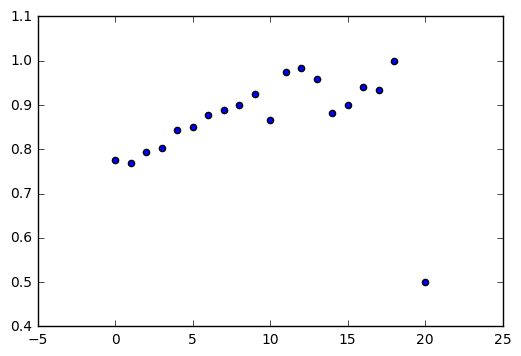

In [4]:
#Scatter plot for level of household head education and average enrollment

df2=pd.DataFrame(progresa_df.groupby('hohedu')['sc97'].mean())
df2['hohedu'] = df2.index
plt.scatter(df2['hohedu'], df2['sc97'])


The relationship, as seen from the graph above, is fairly linear and the average enrollment increases steadily as the level of household head education increases. There are slight drops at 10, 15 and 20 which are interesting to see.

### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households).
* Does there appear to be a difference? Is this difference statistically significant?
* Which D estimator in Schultz (2004) does this approach correspond to?


T statistic
Ttest_indResult(statistic=-2.0157134865156379, pvalue=0.04424870036572115)

 Mean
0.8138394110596501 0.8295362042630732


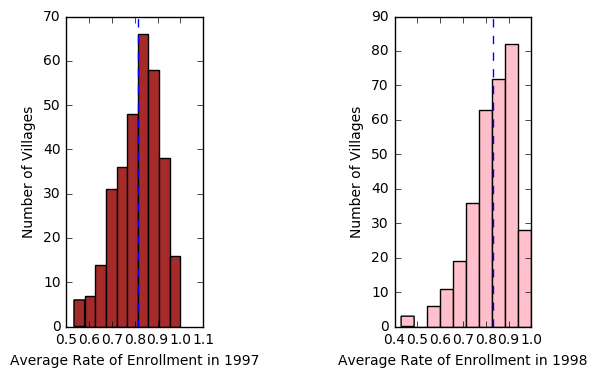

In [5]:
#Subset dataframe
prog_1997 = progresa_df[(progresa_df.year == 97) & (progresa_df.poor == 1) & (progresa_df.progresa == 1)]
df97=pd.DataFrame(prog_1997.groupby('village')['sc'].mean())
prog_98 = progresa_df[(progresa_df.year == 98) & (progresa_df.poor == 1) & (progresa_df.progresa == 1)]
df98=pd.DataFrame(prog_98.groupby('village')['sc'].mean())
fig = plt.figure()
ax1 = fig.add_subplot(131)

#Plot histogram for 1997
ax1.hist(df97['sc'], color = "brown")
xlabel("Average Rate of Enrollment in 1997")
ylabel("Number of Villages")
plt.axvline(df97['sc'].mean(), color='blue', linestyle='dashed')

#Plot histogram for 1998
ax1 = fig.add_subplot(133)
ax1.hist(df98['sc'], color = "pink")
xlabel("Average Rate of Enrollment in 1998")
ylabel("Number of Villages")
plt.axvline(df98['sc'].mean(), color='blue', linestyle='dashed')

#T test
t = stats.ttest_ind(df97['sc'], df98['sc'])
print('\nT statistic')
print(t)
print('\n Mean')
print(df97['sc'].mean(),df98['sc'].mean())


Does there appear to be a difference? Is this difference statistically significant?
We can see that there is a very slight difference in the means of the 2 samples. This implies that there isn't a lot of difference in the samples before and after treatment. To verify this, I also performed a t test and we can see that the p value is slightly <0.05 thus implying that the difference is statistically significant but by a very small margin.


## Part 2: Measuring Impact

### 2.1 Simple differences: T-test

Start out by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment).
* calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages.
* Which difference estimator in Schultz (2004) does this approach correspond to?
* Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [6]:
#Average enrollment rate for Treatment
prog_t = progresa_df[(progresa_df.year == 98) & (progresa_df.poor == 1) & (progresa_df.progresa == 1)]
avg_t = prog_t['sc'].mean()
print('\nAverage enrollment rate for Treatment')
print(avg_t)

#Average enrollment rate for Treatment
prog_c = progresa_df[(progresa_df.year == 98) & (progresa_df.poor == 1) & (progresa_df.progresa == 0)]
avg_c = prog_c['sc'].mean()
print('\nAverage enrollment rate for Control')
print(avg_c)

#T test
t_test = stats.ttest_ind(prog_c['sc'][~np.isnan(prog_c['sc'])], prog_t['sc'][~np.isnan(prog_t['sc'])])
print('\nT test')
print(t_test)





Average enrollment rate for Treatment
0.8464791213954308

Average enrollment rate for Control
0.807636956730308

T test
Ttest_indResult(statistic=-8.3587205674183735, pvalue=6.636344447523235e-17)


The difference estimator that this corresponds to is the D1 difference estimator - 
D1 = S1t - S2t >0 

On observing the results from the t test above, we can conclude that the the treatment had a siginifciant difference in the average enrollment rates. This is because the p value is <<0.05 which implies that the the difference is statistically significant. 



### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [7]:
# Subsetting the data
df_98 = progresa_df[(progresa_df.poor == 1) & (progresa_df.year == 98)]

# Performing regression
lm_fit = smf.ols(formula='sc ~ progresa', data=df_98).fit()
print (lm_fit.params)
print (lm_fit.summary())

Intercept        0.807637
progresa[T.1]    0.038842
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Thu, 26 Jan 2017   Prob (F-statistic):           6.64e-17
Time:                        21:33:01   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------

1. Based on this model, how much did Progresa increase the likelihood of a child enrolling?
Based on this model, we can see that the coefficient of progresa is 0.038. This implies that with the addition of the progresa treatment, there was an increase in the enrollment of students by a factor of 0.038. Thus progresa increased the likelihood of a child enrolling by 0.038.


2. How does your regression estimate compare to your t-test estimate from part 2.1?
Our regression estimates compare well to the t test performed in 2.1. We can see that the coefficient estimate calculated here i.e 0.807 is equal to the average enrollment rate for control. And if we calculate the rate for treatment which in this case will be 0.807 + 1 * 0.038 = 0.84 which is equal to the rate for treatment in 2.1. Thus matching up to the above values.

3. Based on this regression model, can we reject the null hypothesis that the treatment effects are zero?
Based on this, we cannot reject the null hypothesis of the treatment effects being zero since the p value is statistically significant i.e p < 0.05.

4. What is the counterfactual assumption underlying this regression?
The underlying assumption is that in the absence of any treatment, the average enrollment rate for control villages will be equal to treated villages i.e both the groups have no differences before the start of the treatment.

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [8]:
# Multiple linear regression 
m_lm = smf.ols(formula='sc ~ progresa + sex + indig + dist_sec + fam_n + min_dist + dist_cap + hohedu + hohwag + welfare_index + age + hohage', data=df_98).fit()
m_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     849.5
Date:                Thu, 26 Jan 2017   Prob (F-statistic):               0.00
Time:                        21:33:01   Log-Likelihood:                -7541.1
No. Observations:               27263   AIC:                         1.511e+04
Df Residuals:                   27250   BIC:                         1.521e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         1.4431      0.018     80.855      0.000         1.408     1.478
progresa[T.1]     0.0337      0.004      8.418      0.000         0.026     0.042
sex               0.0304      0.004      7.847      0.000         0.023     0.038
indig             0.0188      0.005      3.961      0.000         0.009     0.028
dist_sec         -0.0106      0.001    -12.012      0.000        -0.012    -0.009
fam_n             0.0006      0.001      0.727      0.467        -0.001     0.002
min_dist          0.0004   6.34e-05      6.326      0.000         0.000     0.001
dist_cap          0.0002    3.7e-05      5.512      0.000         0.000     0.000
hohedu            0.0079      0.001      9.224      0.000         0.006     0.010
hohwag         -7.23e-07   2.81e-06     -0.257      0.797     -6.24e-06  4.79e-06
welfare_index  2.283e-05   1.82e-05      1.253      0.210     -1.29e-05  5.85e-05
age              -0.0657      0.001    -94.750      0.000        -0.067    -0.064
hohage        -2.299e-05      0.000     -0.118      0.906        -0.000     0.000
==============================================================================
Omnibus:                     2940.375   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3992.254
Skew:                          -0.930   Prob(JB):                         0.00
Kurtosis:                       3.237   Cond. No.                     9.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. How do the controls affect the point estimate of treatment effect?
The controls have a slight affect on the point estimates of the treatment effects as we can see that the coefficient value of Progresa decreases from 0.0388 to 0.0337. This though does not necessarily imply a great affect on the siginificance of the variable.

2. How do the controls affect the standard error on the treatment effect?
The controls tend to enhance the performance of the model as they decrease standard error from 0.005 to 0.004. Even though this is a very slight decrease, it still informs us that the model has slightly improved with the addition of these new variables. 

3. How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?
We can see that the value of r squared has significantly increased as compared to 2.2. This implies that our model has significantly improved on adding the various variables in the model. We can also see that the F statistic has iproved significantly indicating a better fit.

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages. The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [9]:
# Subsetting data 
df_97 = progresa_df[(progresa_df.poor == 1) & (progresa_df.year == 97)]

# Calculating mean 
t_98 = df_98['sc'][df_98.progresa == 1].mean() 
print("Treatment for 98", t_98)

t_97 = df_97['sc'][df_97.progresa == 1].mean()
print("Treatment for 97", t_97)

c_98 =  df_98['sc'][df_98.progresa == 0].mean()
print("Control for 98", c_98)

c_97 =  df_97['sc'][df_97.progresa == 0].mean()
print("Control for 97", c_97)

# Finding the difference in difference 
diff_in_diff = (t_98 - t_97) - (c_98 - c_97)

print ("\nThe difference in difference value is: ", diff_in_diff)


Treatment for 98 0.8464791213954308
Treatment for 97 0.8226968874033842
Control for 98 0.807636956730308
Control for 97 0.8151860030575845

The difference in difference value is:  0.031331280319323085


1. What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
We can see that the difference in difference estimate is 0.0313 which is slightly lower than the one produced with simple difference i.e 0.388.

2. What is the counterfactual assumption underlying this estimate?
Our assumption is that the enrollment for the treatment and control group would have been the same had there been no treatment. 

### 2.5 Difference-in-Difference, version 1 (regression)

Now use a regression specification to estimate the average treatment effect of the program (on the poor) in a difference-in-differences framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* How do these estimates of the treatment effect compare to the estimates based on the simple difference?
* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
* What is the counterfactual assumption underlying this regression? 

In [11]:
#Include data with only the poor
prog_poor = progresa_df[progresa_df['poor'] == 1]

#Create dummy variable for time 
progresa_df.loc[progresa_df.year == 97, 'dv'] = 0
progresa_df.loc[progresa_df.year == 98, 'dv'] = 1

pd.to_numeric(progresa_df['progresa'])
pd.to_numeric(progresa_df['poor'])

diff_reg = smf.ols(formula = 'sc ~ progresa + dv + progresa:dv + sex + indig + dist_sec  + min_dist + dist_cap + hohedu + age ', data=prog_poor).fit()
diff_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     2297.
Date:                Thu, 26 Jan 2017   Prob (F-statistic):               0.00
Time:                        21:33:10   Log-Likelihood:                -16541.
No. Observations:               58165   AIC:                         3.310e+04
Df Residuals:                   58154   BIC:                         3.320e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            1.4358      0.007    200.258      0.000         1.422     1.450
progresa[T.1]        0.0031      0.004      0.819      0.413        -0.004     0.011
dv                   0.0271      0.004      6.255      0.000         0.019     0.036
progresa[T.1]:dv     0.0313      0.006      5.691      0.000         0.021     0.042
sex                  0.0333      0.003     12.489      0.000         0.028     0.039
indig                0.0238      0.003      7.319      0.000         0.017     0.030
dist_sec            -0.0098      0.001    -15.880      0.000        -0.011    -0.009
min_dist             0.0004   4.38e-05      8.475      0.000         0.000     0.000
dist_cap             0.0002   2.55e-05      7.495      0.000         0.000     0.000
hohedu               0.0069      0.001     12.841      0.000         0.006     0.008
age                 -0.0656      0.000   -145.203      0.000        -0.067    -0.065
==============================================================================
Omnibus:                     5449.364   Durbin-Watson:                   1.492
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7146.926
Skew:                          -0.857   Prob(JB):                         0.00
Kurtosis:                       3.106   Cond. No.                     1.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
We create a dummy variable to differentiate between values for the year 97 and 98, to be able to measure the interaction term. We can see that the p value for progresa alone is not statistically significant but the interaction term is. Thus we can say that for families sampled in 1998, the average enrollment rate is 0.0313 (coefficient estimate) higher as compared to 1997. Thus implying that the interaction of year and progresa had a positive impact on the average enrollment. 
We see that all variables except Progresa have a statistically significant relationship with the enrollment.

2. How do these estimates of the treatment effect compare to the estimates based on the simple difference?
The estimates of the treatment effect are slightly lower than the ones we calculated in the simple difference. This might be because of the interaction term introduced which leads to a better precision. 

3. How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
The estimates in this is more or less equivalent to the ones calculated in 2.4. The slight difference can be due to the addition of the conrol variable.

4. What is the counterfactual assumption underlying this regression?
The assumption underlying this regression is that the trends in both the groups would have remained unchanged without the inclusion of the treatment.

### 2.6 Difference-in-Difference, version 2

In the previous problem, you estimated a difference-in-differences model that compared changes in enrollment rates over time across treatment and control villages. An alternative approach would be to compare enrollment rates in 1998 between poor and non-poor across treatment and control villages. 

* How would we estimate this version of the treatment effects in a regression model? 
* What is the counterfactual assumption underlying this regression?
* How do these treatment effects compare to the estimates above?
* Discuss some possible explanations for differences or similarities 

In [12]:
# use a dummy variable for poor and non poor 
# Restrict data to the year 1998
progresa_98 = progresa_df[progresa_df['year'] == 98]
diff_reg2 = smf.ols(formula = 'sc ~ progresa + poor + progresa:poor + sex + indig + dist_sec  + min_dist + dist_cap + hohedu + age', data=progresa_98).fit()
diff_reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     1206.
Date:                Thu, 26 Jan 2017   Prob (F-statistic):               0.00
Time:                        21:33:13   Log-Likelihood:                -9216.0
No. Observations:               31975   AIC:                         1.845e+04
Df Residuals:                   31964   BIC:                         1.855e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                   1.4874      0.012    122.624      0.000         1.464     1.511
progresa[T.1]               0.0244      0.010      2.515      0.012         0.005     0.043
poor[T.1]                  -0.0241      0.008     -2.913      0.004        -0.040    -0.008
progresa[T.1]:poor[T.1]     0.0102      0.010      0.971      0.332        -0.010     0.031
sex                         0.0306      0.004      8.459      0.000         0.023     0.038
indig                       0.0181      0.004      4.032      0.000         0.009     0.027
dist_sec                   -0.0109      0.001    -13.034      0.000        -0.013    -0.009
min_dist                    0.0003   5.93e-05      5.649      0.000         0.000     0.000
dist_cap                    0.0003   3.51e-05      7.398      0.000         0.000     0.000
hohedu                      0.0085      0.001     12.302      0.000         0.007     0.010
age                        -0.0662      0.001   -103.741      0.000        -0.067    -0.065
==============================================================================
Omnibus:                     3161.284   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4205.406
Skew:                          -0.887   Prob(JB):                         0.00
Kurtosis:                       3.109   Cond. No.                     1.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. How would we estimate this version of the treatment effects in a regression model?
We can see that the estimates have changed significantly along with their statistical significance
The progresa variable is now statistically significant with the estimate of 0.0244 which is higher than the estimate obtained in the previous step.
The poor variable now has a negative coefficient which might imply that the enrollment rates for poor houselds is still low and this value is statistically significant.
The interaction term has a positive coefficient but now has become statistically insignificant.


2. What is the counterfactual assumption underlying this regression?
The assumption in this regression is that the average enrollment rate for poor and non poor households would have stayed the same had there been no treatment.

3. How do these treatment effects compare to the estimates above?
The treatment effects in this regression suggest that the interaction term of progresa and poor is no longer statistically signiificant whereas progresa becomes statistically significant, with the value of coefficient estimates higher than the ones obtained above. The estimate for the interaction term obtained above is higher than the estimate oobtained in this regression, thus suggesting slightly higher impact.

4. Discuss some possible explanations for differences or similarities
The reason behind the interaction term becoming stastically insignificant can be attributed to the fact that the non poor households were not subjected to the treatment but already had above average enrollment rates. Thus it doesnt really help the model explain the difference between the enrollment rates.


### 2.7 Spillover effects (extra credit)

Thus far, we have focused on the impact of PROGRESA on poor households. Repeat your analysis in 2.5, using a double-difference regression to estimate the impact of PROGRESA on non-poor households. In other words, compare the difference in enrollments between 1997 and 1998 for non-poor households in treatment villages with the difference in enrollments between 1997 and 1998 for non-poor households in control villages.

* A: Describe one or two reasons why PROGRESA might have impacted non-poor households.
* B: Do you observe any impacts of PROGRESA on the non-poor?
* C: What is the identifying assumption that you are using to estimate the impact of PROGRESA on non-poor households.

In [13]:
#Subset data for non poor households
progresa_not_poor = progresa_df[progresa_df['poor'] == 0]

#Fitting regression function
diff_reg3 = smf.ols(formula = 'sc ~ progresa + dv + progresa:dv + sex + indig + dist_sec  + min_dist + dist_cap + hohedu + age + hohage', data=progresa_not_poor).fit()
diff_reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     388.0
Date:                Thu, 26 Jan 2017   Prob (F-statistic):               0.00
Time:                        21:33:13   Log-Likelihood:                -3642.3
No. Observations:               10378   AIC:                             7309.
Df Residuals:                   10366   BIC:                             7396.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            1.4764      0.024     61.778      0.000         1.430     1.523
progresa[T.1]        0.0246      0.009      2.651      0.008         0.006     0.043
dv                   0.0394      0.011      3.659      0.000         0.018     0.060
progresa[T.1]:dv    -0.0030      0.014     -0.214      0.830        -0.030     0.024
sex                  0.0303      0.007      4.490      0.000         0.017     0.044
indig                0.0129      0.010      1.237      0.216        -0.008     0.033
dist_sec            -0.0154      0.002     -8.726      0.000        -0.019    -0.012
min_dist         -8.567e-05      0.000     -0.740      0.459        -0.000     0.000
dist_cap             0.0006   7.62e-05      8.293      0.000         0.000     0.001
hohedu               0.0090      0.001      7.555      0.000         0.007     0.011
age                 -0.0686      0.001    -59.984      0.000        -0.071    -0.066
hohage            7.182e-05      0.000      0.214      0.831        -0.001     0.001
==============================================================================
Omnibus:                      840.967   Durbin-Watson:                   1.504
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              800.243
Skew:                          -0.620   Prob(JB):                    1.70e-174
Kurtosis:                       2.439   Cond. No.                     1.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A: Describe one or two reasons why PROGRESA might have impacted non-poor households.
The progresa program might have impacted non poor households as it might have created the environment of sending kids to school. This can have a mirror effect on individuals who are inclined to send their kids to school after looking at others. This can explain the increase in the average enrollment rates for non poor households

B: Do you observe any impacts of PROGRESA on the non-poor?
Yes, there is an impat of the progresa on the non poor as we can see a positive value of the coefficient estimate which is statistically significant. Thus we can conclude that the average enrollment rates increases by a factor of 0.0394 by the change in year, which is significant.

C: What is the identifying assumption that you are using to estimate the impact of PROGRESA on non-poor households.
The identifying assumption is that there would have been no difference in the enrollment rates of non-poor household had there been no introduction of progresa treatment.


### 2.8 Summary

Based on all the analysis you have undertaken to date, do you thik that Progresa had a causal impact on the enrollment rates of poor households in Mexico?

Based on the analysis performed above, we can conclude that Progresa had a causal impact on enrollment rates of household in Mexico, and not just the poor household but even the non-poor household as an additional effect. Thus the Progresa program proved to be beneficial for the treatment as well as control group. This is on the assumption that there would have been no additional effect had this program not been introduced and all the other factors were kept constant. 

Thus as a final verdict, the Progresa did help the the average enrollment rates to increase (even though by a small number) in Mexico.